<a href="https://colab.research.google.com/github/JaynthReddy91/DL/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models, regularizers

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the input data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# 🔹 FIX: Reshape 28x28 images into 784-length vectors
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define a simple model with L2 regularization
def build_l2_model():
    model = models.Sequential([
        layers.Dense(64, activation='relu',
                     input_shape=(784,),
                     kernel_regularizer=regularizers.l2(0.01)),
        layers.Dense(64, activation='relu',
                     kernel_regularizer=regularizers.l2(0.01)),
        layers.Dense(10, activation='softmax')
    ])
    return model

model_l2 = build_l2_model()

model_l2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model_l2.fit(
    x_train,
    y_train,
    epochs=10,
    validation_split=0.2,
    batch_size=32
)

# Evaluate the model
test_loss, test_acc = model_l2.evaluate(x_test, y_test)

print(f"Test accuracy: {test_acc:.4f}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8266 - loss: 1.2568 - val_accuracy: 0.9179 - val_loss: 0.5502
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9147 - loss: 0.5460 - val_accuracy: 0.9352 - val_loss: 0.4553
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9269 - loss: 0.4718 - val_accuracy: 0.9307 - val_loss: 0.4355
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9342 - loss: 0.4323 - val_accuracy: 0.9423 - val_loss: 0.4002
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9384 - loss: 0.4006 - val_accuracy: 0.9419 - val_loss: 0.3807
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9391 - loss: 0.3891 - val_accuracy: 0.9485 - val_loss: 0.3590
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9421 - loss: 0.3675 - val_accuracy: 0.9398 - val_loss: 0.3587
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9456 - loss: 0.3532 - 

In [10]:
from tensorflow.keras.datasets import fashion_mnist
def build_custom_l2_model(l2_strength=0.005):
    model = models.Sequential([
        layers.Dense(64, activation='relu',
                     input_shape=(784,),
                     kernel_regularizer=regularizers.l2(l2_strength)),
        layers.Dense(64, activation='relu',
                     kernel_regularizer=regularizers.l2(l2_strength)),
        layers.Dense(10, activation='softmax')
    ])
    return model


# Load the Fashion MNIST dataset
(x_train_fashion, y_train_fashion), (x_test_fashion, y_test_fashion) = fashion_mnist.load_data()

# Normalize the input data
x_train_fashion = x_train_fashion.astype("float32") / 255.0
x_test_fashion = x_test_fashion.astype("float32") / 255.0

# Reshape 28x28 images into 784-length vectors
x_train_fashion = x_train_fashion.reshape(-1, 784)
x_test_fashion = x_test_fashion.reshape(-1, 784)

# One-hot encode the labels
y_train_fashion = to_categorical(y_train_fashion, 10)
y_test_fashion = to_categorical(y_test_fashion, 10)


model_l2_fashion = build_l2_model()

model_l2_fashion.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Training model on Fashion MNIST...")
history_fashion = model_l2_fashion.fit(
    x_train_fashion,
    y_train_fashion,
    epochs=10,
    validation_split=0.2,
    batch_size=32
)

# Evaluate the model on Fashion MNIST
test_loss_fashion, test_acc_fashion = model_l2_fashion.evaluate(x_test_fashion, y_test_fashion)

print(f"Fashion MNIST Test accuracy: {test_acc_fashion:.4f}")

Training model on Fashion MNIST...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6215 - loss: 2.7885 - val_accuracy: 0.7938 - val_loss: 1.7272
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8003 - loss: 1.5862 - val_accuracy: 0.8086 - val_loss: 1.2474
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8201 - loss: 1.1576 - val_accuracy: 0.8204 - val_loss: 0.9801
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8263 - loss: 0.9276 - val_accuracy: 0.8247 - val_loss: 0.8372
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8283 - loss: 0.8011 - val_accuracy: 0.8282 - val_loss: 0.7443
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8298 - loss: 0.7358 - val_accuracy: 0.8322 - val_loss: 0.6982
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8363 - loss: 0.6838 - val_accuracy: 0.8363 - val_loss: 0.6606
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step -

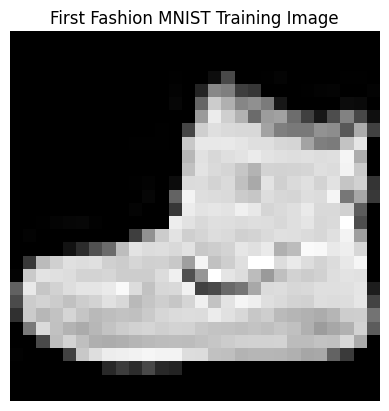

Shape of the first data point: (784,)
Pixel values of the first data point (flattened):
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.  

In [12]:
import matplotlib.pyplot as plt

# Reshape the first image from the Fashion MNIST training set to its original 28x28 format
first_fashion_image = x_train_fashion[0].reshape(28, 28)

# Display the image
plt.imshow(first_fashion_image, cmap='gray')
plt.title('First Fashion MNIST Training Image')
plt.axis('off') # Hide axes ticks and labels
plt.show()

print(f"Shape of the first data point: {x_train_fashion[0].shape}")
print(f"Pixel values of the first data point (flattened):\n{x_train_fashion[0]}")

In [19]:
model_l2_fashion = build_l2_model()

model_l2_fashion.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Training model on Fashion MNIST...")
history_fashion = model_l2_fashion.fit(
    x_train_fashion,
    y_train_fashion,
    epochs=10,
    validation_split=0.2,
    batch_size=32
)

# Evaluate the model on Fashion MNIST
test_loss_fashion, test_acc_fashion = model_l2_fashion.evaluate(x_test_fashion, y_test_fashion)

print(f"Fashion MNIST Test accuracy: {test_acc_fashion:.4f}")

Training model on Fashion MNIST...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7419 - loss: 1.4232 - val_accuracy: 0.8129 - val_loss: 0.7381
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8143 - loss: 0.7294 - val_accuracy: 0.8283 - val_loss: 0.6630
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8188 - loss: 0.6740 - val_accuracy: 0.8294 - val_loss: 0.6373
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8232 - loss: 0.6381 - val_accuracy: 0.8338 - val_loss: 0.6027
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8269 - loss: 0.6145 - val_accuracy: 0.8433 - val_loss: 0.5838
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8336 - loss: 0.5931 - val_accuracy: 0.8273 - val_loss: 0.6088
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8337 - loss: 0.5865 - val_accuracy: 0.8383 - val_loss: 0.5837
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step -

### What is Data Augmentation?

Data augmentation artificially expands the training dataset by creating modified versions of existing images. This helps expose the model to a wider variety of data, making it more robust and less prone to overfitting.

Common augmentation techniques for images include:
*   **Rotation:** Rotating images by a certain degree.
*   **Width/Height Shift:** Shifting images horizontally or vertically.
*   **Zoom:** Randomly zooming in or out of images.
*   **Horizontal/Vertical Flip:** Flipping images horizontally or vertically.
*   **Brightness Adjustment:** Randomly changing the brightness of images.

We'll use `tf.keras.preprocessing.image.ImageDataGenerator` to apply these transformations.

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Reshape x_train_fashion back to 28x28x1 for ImageDataGenerator
x_train_fashion_reshaped = x_train_fashion.reshape(-1, 28, 28, 1)

# Define the data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=10,        # Rotate images by a maximum of 10 degrees
    width_shift_range=0.1,    # Shift images horizontally by up to 10% of the width
    height_shift_range=0.1,   # Shift images vertically by up to 10% of the height
    zoom_range=0.1,           # Zoom in/out by up to 10%
    horizontal_flip=True,     # Randomly flip images horizontally
    fill_mode='nearest'       # Fill in new pixels created by transformations
)

# Fit the generator to the training data
datagen.fit(x_train_fashion_reshaped)

print("ImageDataGenerator configured and fitted to training data.")

ImageDataGenerator configured and fitted to training data.


Let's visualize an original image and a few augmented versions of it to see the effects of the transformations.

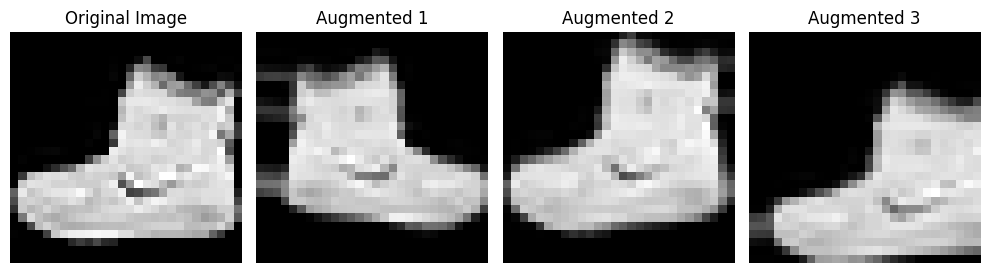

Displayed original and augmented images.


In [16]:
import matplotlib.pyplot as plt

# Take a sample image (e.g., the first image from the reshaped training set)
sample_image = x_train_fashion_reshaped[0]

# Generate a batch of augmented images
augmented_images_iterator = datagen.flow(np.expand_dims(sample_image, 0), batch_size=1)

plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 4, 1)
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Display 3 augmented versions
for i in range(3):
    plt.subplot(1, 4, i + 2)
    augmented_image = next(augmented_images_iterator)[0].reshape(28, 28)
    plt.imshow(augmented_image, cmap='gray')
    plt.title(f'Augmented {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

print("Displayed original and augmented images.")

In [17]:
model_l2_fashion = build_l2_model()

model_l2_fashion.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Training model on Fashion MNIST...")
history_fashion = model_l2_fashion.fit(
    x_train_fashion,
    y_train_fashion,
    epochs=10,
    validation_split=0.2,
    batch_size=32
)

# Evaluate the model on Fashion MNIST
test_loss_fashion, test_acc_fashion = model_l2_fashion.evaluate(x_test_fashion, y_test_fashion)

print(f"Fashion MNIST Test accuracy: {test_acc_fashion:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model on Fashion MNIST...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7371 - loss: 1.4176 - val_accuracy: 0.8100 - val_loss: 0.7628
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8137 - loss: 0.7224 - val_accuracy: 0.8222 - val_loss: 0.6654
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8215 - loss: 0.6615 - val_accuracy: 0.8248 - val_loss: 0.6361
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8289 - loss: 0.6332 - val_accuracy: 0.8353 - val_loss: 0.6029
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8272 - loss: 0.6182 - val_accuracy: 0.8356 - val_loss: 0.5937
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8301 - loss: 0.6040 - val_accuracy: 0.8352 - val_loss: 0.5685
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8362 - loss: 0.5833 - val_accuracy: 0.8260 - val_loss: 0.5953
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step -

In [22]:
print("Training model with data augmentation on Fashion MNIST...")

# Build a fresh model to train with augmentation (optional, but good practice)
# The original build_l2_model expects flattened input, but datagen.flow outputs 28x28x1 images.
# We need to adapt the model to handle 28x28x1 input by adding a Flatten layer.
model_l2_fashion_augmented = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)), # Flatten the 28x28x1 images to 784 features
    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(10, activation='softmax')
])

model_l2_fashion_augmented.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model using the data generator
history_fashion_augmented = model_l2_fashion_augmented.fit(
    datagen.flow(x_train_fashion_reshaped, y_train_fashion, batch_size=32),
    epochs=10,
    validation_data=(x_test_fashion.reshape(-1, 28, 28, 1), y_test_fashion), # Validate on unaugmented test data
    steps_per_epoch=len(x_train_fashion_reshaped) // 32
)

# Evaluate the model on Fashion MNIST (unaugmented test set)
test_loss_fashion_augmented, test_acc_fashion_augmented = model_l2_fashion_augmented.evaluate(
    x_test_fashion.reshape(-1, 28, 28, 1),
    y_test_fashion
)

print(f"Fashion MNIST Test accuracy with augmentation: {test_acc_fashion_augmented:.4f}")

Training model with data augmentation on Fashion MNIST...
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.6075 - loss: 1.6583 - val_accuracy: 0.7222 - val_loss: 0.9338
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.6906 - loss: 1.0045 - val_accuracy: 0.6911 - val_loss: 0.9008
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.6987 - loss: 0.9466 - val_accuracy: 0.7485 - val_loss: 0.8213
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.7048 - loss: 0.9199 - val_accuracy: 0.7415 - val_loss: 0.8042
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.7065 - loss: 0.9084 - val_accuracy: 0.7377 - val_loss: 0.8125
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.7123 - loss: 0.8809 - val_accuracy: 0.7401 - val_loss: 0.8042
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.7167 - loss: 0.8689 - val_accuracy: 0.7574 - val_loss: 0.7614
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.7149 - loss: 0.86

In [23]:
print("Training model with data augmentation and reduced L2 regularization on Fashion MNIST...")

# 1. Define a new sequential model named model_l2_fashion_augmented_reduced_l2
model_l2_fashion_augmented_reduced_l2 = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)), # Flatten the 28x28x1 images to 784 features
    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)), # Reduced L2 strength
    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)), # Reduced L2 strength
    layers.Dense(10, activation='softmax')
])

# 2. Compile the model
model_l2_fashion_augmented_reduced_l2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 3. Train the model using the data generator
history_fashion_augmented_reduced_l2 = model_l2_fashion_augmented_reduced_l2.fit(
    datagen.flow(x_train_fashion_reshaped, y_train_fashion, batch_size=32),
    epochs=10,
    validation_data=(x_test_fashion.reshape(-1, 28, 28, 1), y_test_fashion), # Validate on unaugmented test data
    steps_per_epoch=len(x_train_fashion_reshaped) // 32
)

# 4. Evaluate the trained model on Fashion MNIST (unaugmented test set)
test_loss_fashion_augmented_reduced_l2, test_acc_fashion_augmented_reduced_l2 = model_l2_fashion_augmented_reduced_l2.evaluate(
    x_test_fashion.reshape(-1, 28, 28, 1),
    y_test_fashion
)

print(f"Fashion MNIST Test accuracy with augmentation and reduced L2: {test_acc_fashion_augmented_reduced_l2:.4f}")

Training model with data augmentation and reduced L2 regularization on Fashion MNIST...
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.6202 - loss: 1.1708 - val_accuracy: 0.7520 - val_loss: 0.7516
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.7316 - loss: 0.8231 - val_accuracy: 0.7559 - val_loss: 0.7273
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.7441 - loss: 0.7763 - val_accuracy: 0.7792 - val_loss: 0.6891
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.7552 - loss: 0.7421 - val_accuracy: 0.7601 - val_loss: 0.6955
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.7579 - loss: 0.7332 - val_accuracy: 0.7854 - val_loss: 0.6822
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.7620 - loss: 0.7167 - val_accuracy: 0.7953 - val_loss: 0.6431
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.7648 - loss: 0.7051 - val_accuracy: 0.7964 - val_loss: 0.6277
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.7655 - loss: 0.69